In [5]:
from pyuvdata import UVCal
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

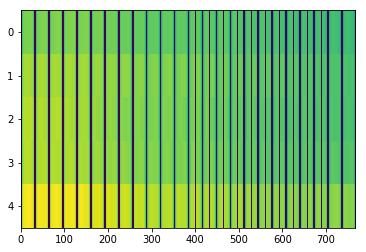

In [9]:
#Type in list of specified antenna names/numbers, polarization, filename. Defaults set to None.

#List of antenna names. Cannot be provided if antenna nums is also provided.
antenna_namelist = None

#List of antenna numbers. Cannot be provided if antenna names is also provided.
antenna_numlist = [0,1,2,3,4]

#Array of polarizations.
polarization_array = [-6]

#Fill in with filename.
filename = '1163765528.calfits'

#Displays waterfall plot of UV Gains corresponding to specified parameters.
plot_gains(antenna_namelist, antenna_numlist, polarization_array, filename)

In [7]:
#Displays waterfall plot of UV Gains of specified antenna names/numbers and polarizations.
def plot_gains(antenna_name, antenna_number, polarization_array, filename):
    cal = UVCal()
    cal.read_calfits(filename)
    if antenna_name == None:
        antenna_list = None
    else:
        antenna_list = [[] for x in range(0,len(antenna_name))]
        for i in antenna_name:
            antenna_list[antenna_name.index(i)].append(i)
    if antenna_number == None:
        antenna_num = None
    else:
        antenna_num = antenna_number
    newcal = cal.select(antenna_names = antenna_list, antenna_nums = antenna_num, jones = polarization_array, inplace = False)
    plt.imshow(np.abs(np.abs(newcal.gain_array[:,0,:,0,0])), aspect='auto')
    plt.show()

[-5 -6]
2


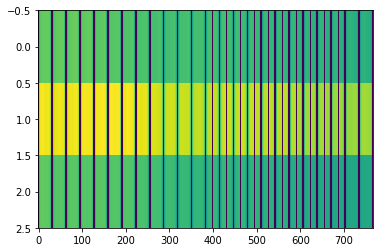

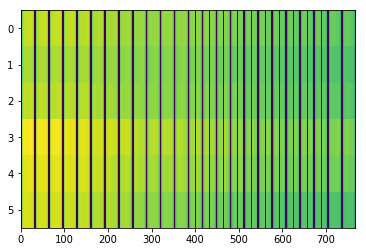

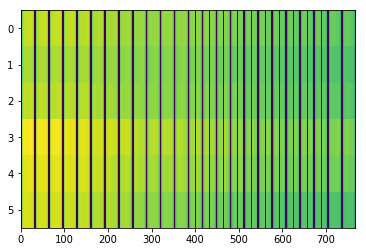

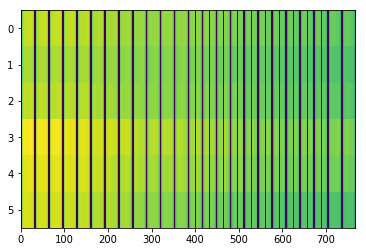

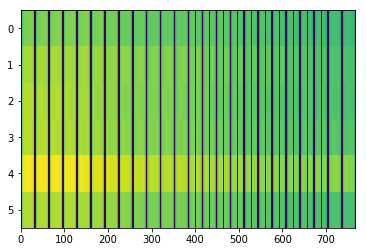

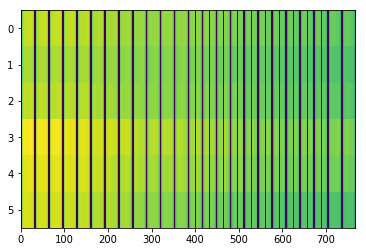

In [8]:
cal = UVCal()
filename = '1163765528.calfits'
cal.read_calfits(filename)

plt.imshow(np.abs(np.abs(cal.gain_array[:,0,:,0,0])), aspect='auto')
#plt.show()
#newcal = cal.select(antenna_nums = [0], inplace = False)

antenna_name = ["      11", '    1004', '    1021']
antenna_list = [[] for x in range(0,len(antenna_name))]
for i in antenna_name:
    antenna_list[antenna_name.index(i)].append(i)

#print(antenna_list)
print(cal.jones_array)
print(len(cal.jones_array))
        
newcal = cal.select(antenna_names = [["      11"], ['    1004'], ['    1021']], inplace = False)
#newcal = cal.select(antenna_names = [["      11", '    1004', '    1021']], inplace = False)
# print(cal.antenna_numbers)
#print(cal.antenna_names)
# print(cal.__dict__)
# print(cal.antenna_names[0])
#print(cal.antenna_names[127])
#print(len(cal.antenna_names))
d = [[] for x in range(0,10)]
#print (d)
#print (d[0])
d[0].append(3)
d[4].append(5)
#print(d)

plt.imshow(np.abs(np.abs(newcal.gain_array[:,0,:,0,0])), aspect='auto')
plt.show()

newcal2 = cal.select(antenna_nums = [0, 1, 2, 3, 4, 15], inplace = False)
plt.imshow(np.abs(np.abs(newcal2.gain_array[:,0,:,0,0])), aspect='auto')
plt.show()

newcal6 = cal.select(antenna_nums = [0, 1, 2, 3, 4, 15], jones = cal.jones_array, inplace = False)
plt.imshow(np.abs(np.abs(newcal6.gain_array[:,0,:,0,0])), aspect='auto')
plt.show()

newcal3 = cal.select(antenna_nums = [0, 1, 2, 3, 4, 15], jones = [-5], inplace = False)
plt.imshow(np.abs(np.abs(newcal3.gain_array[:,0,:,0,0])), aspect='auto')
plt.show()

newcal4 = cal.select(antenna_nums = [0, 1, 2, 3, 4, 15], jones = [-6], inplace = False)
plt.imshow(np.abs(np.abs(newcal4.gain_array[:,0,:,0,0])), aspect='auto')
plt.show()

newcal5 = cal.select(antenna_nums = [0, 1, 2, 3, 4, 15], jones = None, inplace = False)
plt.imshow(np.abs(np.abs(newcal5.gain_array[:,0,:,0,0])), aspect='auto')
plt.show()


#Displays waterfall plot of UV Gains of specified antenna numbers and polarizations.
def plot_gains_num(antenna_num, polarization_array, filename):
    cal = UVCal()
    cal.read_calfits(filename)
    newcal = cal.select(antenna_nums = antenna_num, jones = polarization_array, inplace = False)
    plt.imshow(np.abs(np.abs(newcal.gain_array[:,0,:,0,0])), aspect='auto')
    plt.show()